**Name:** <span style="color:red">Write your name here</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 4

# Positive feedback


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objective of this practical is to explore the behaviour of a system with a positive feedback motif. In particular, we will use numerical integration of an ordinary differential equation model to analyze the behavior of a phosphorylation/dephosphorylation cycle as the kinase concentration (acting as input signal) is cycled from a low to a high level and back.

Consider the phosphorylation/dephosphorylation cycle shown in the figure
below, in which phosphorylation is induced by both a stimulus signal
$S$ and by the phosphorylated protein itself, in the form of a positive
feedback loop. Assuming that the latter process is cooperative, the
model of this system can be written as:

<img style="margin: 20px; float: right" src="http://dsb.upf.edu/biocomp/figs/irrevers.png" width="15%"/>

$$\frac{dA_p}{dt}=k_p SA+\beta\frac{A_p^n}{K^n+A_p^n}-k_dA_p$$

where
$k_p$ is the activation (phosphorylation) rate, $k_d$ is the
inactivation (dephosphorylation) rate, $A$ is the concentration of the
unphosphorylated protein, and $A_p$ is the concentration of the
phosphorylated protein.
We will assume that the total protein concentration, $A_T=A+A_p$, is
constant. We will consider the following parameter values: $K=50$,
$A_T=100$, $k_d=0.11$, $\beta=10$, $k_p=0.1$, and $n=4$.

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

First, integrate numerically, up to $t=100$, the differential equation
above for a low (basal) stimulus level, such as $S=0.01$, assuming
that initially the protein is completely unphosphorylated.

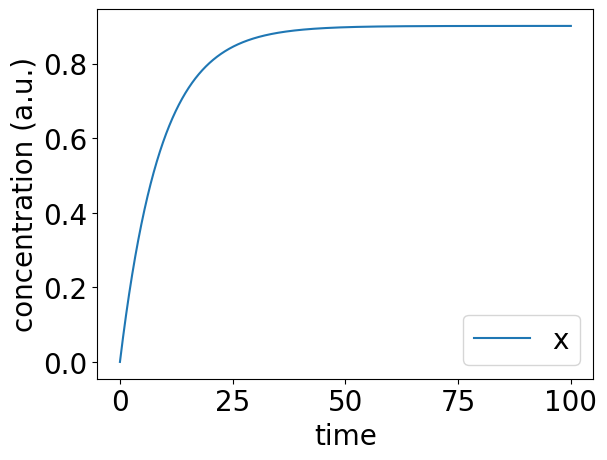

In [9]:
def test(A,t):
    dx=kp * S * (100-A) + beta * (A**n/ (K**n + A**n)) - kd * A
    return dx

kp = 0.1
beta = 10
K = 50
kd = 0.11
n = 4
S =0.01
tvec = np.arange(0,100,0.01)
Ap_0 = 0
y = odeint(test,Ap_0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (Ap)')
plt.ylabel('concentration (Ap)')
plt.title("Kd = 0.11, S = 0.01")
plt.show()

---

We plot the evolution of the phosophorilated A as time goes by and we get a steady state 0.9 where every A is phosphorilated

---

Nest, starting from the stationary situation obtained in the previous
case, study the effect of suddenly applying a large stimulus signal,
so that $S$ suddenly jumps to a high level, such as $S=1$.

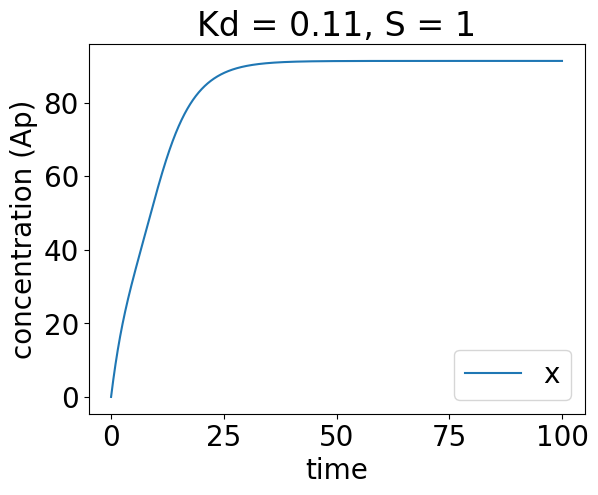

91.30983500498749


In [29]:
def test(A,t):
    dx=kp * S * (100-A) + beta * (A**n/ (K**n + A**n)) - kd * A
    return dx

kp = 0.1
beta = 10
K = 50
kd = 0.11
n = 4
S =1
tvec = np.arange(0,100,0.01)
Ap_0 = 0
y = odeint(test,Ap_0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (Ap)')
plt.ylabel('concentration (Ap)')
plt.title("Kd = 0.11, S = 1")
plt.show()
print(y[-1].item())

---

When S is higher the concentration of Ap inreases far quicker and gets to a much higher equilibrium point. 

---

Next, starting from the latest stationary situation, integrate
the equations again for $S=0.01$. Does the system go back to its
original state?

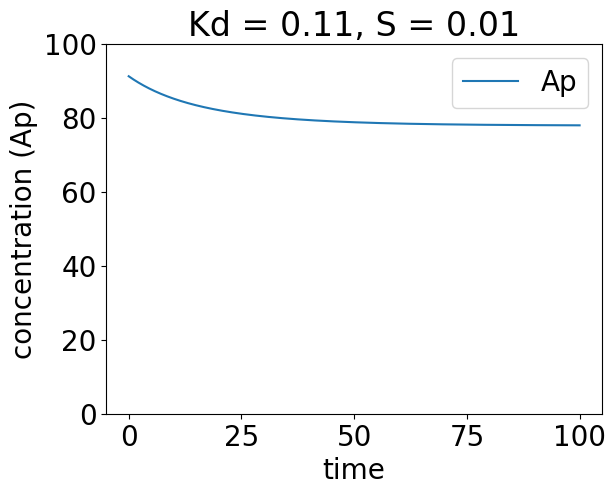

In [27]:
def test(A,t):
    dx = kp * S * (100-A) + beta * (A**n/ (K**n + A**n)) - kd * A
    return dx

kp = 0.1
beta = 10
K = 50
kd = 0.11
n = 4
S =0.01

tvec = np.arange(0,100,0.01)
Ap_0 = 0
y1 = odeint(test,y[-1].item(),tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y1[:,0],label='Ap')
plt.legend()
plt.ylim(0,100)
plt.xlabel('time')
plt.ylabel('concentration (Ap)')
plt.title("Kd = 0.11, S = 0.01")
plt.show()

---

We can see that the system does not down to its original state, it fixes down to 77.5 

---

Finally, continue further to $S=0$, thus eliminating the stimulus
completely. Does the system now go back to its original
state? 

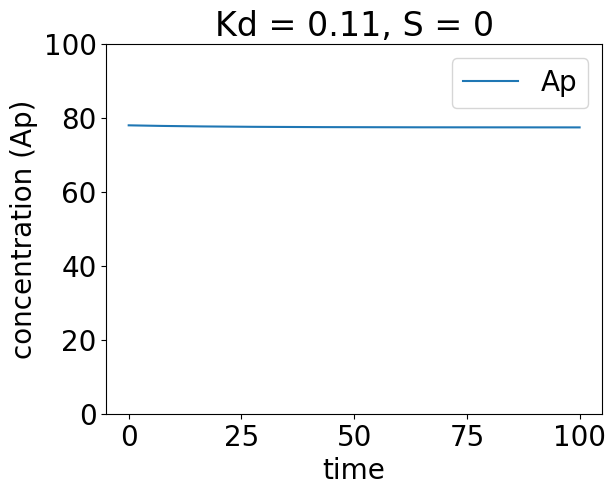

[78.02882319] [77.46914883]


In [45]:
def test(A,t):
    dx = kp * S * (100-A) + beta * (A**n/ (K**n + A**n)) - kd * A
    return dx

kp = 0.1
beta = 10
K = 50
kd = 0.11
n = 4
S = 0

tvec = np.arange(0,100,0.01)
Ap_0 = 0
y2 = odeint(test,y1[-1].item(),tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y2[:,0],label='Ap')
plt.legend()
plt.ylim(0,100)
plt.xlabel('time')
plt.ylabel('concentration (Ap)')
plt.title("Kd = 0.11, S = 0")
plt.show()
print(y2[0], y2[-1])

---

No, it still does not go back to its original state, thus it decreases just a bit. 

---

Now we will manually compute a bifurcation diagram of the system. 
In order to do this, choose a range of S values from 0 to 1. Start for S=0 considering that the protein is unphosphorylated at the beginning. Then, for each S value do a simulation starting each integration at the previous steady state, and save the new steady state value. Plot the results in a graph where the x axis is S, and the y axis is the steady state reached (from each simulation). Then do the same but in reverse order (starting from high S) and plot the results in a different color.

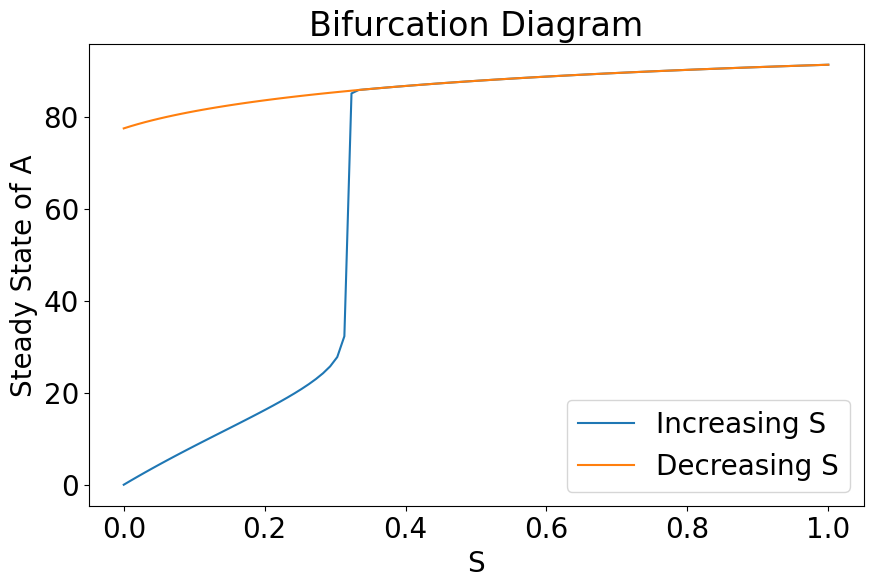

In [72]:
def test(A, t, S):
    kp = 0.1
    beta = 10
    K = 50
    kd = 0.11
    n = 4
    dA_dt = kp * S * (100 - A) + beta * (A**n / (K**n + A**n)) - kd * A
    return dA_dt

def forward(A_0, tvec, S):
    y = odeint(test, A_0, tvec, args=(S,))
    return y[-1][0]  

tvec = np.arange(0, 100, 0.01)  
S_values = np.linspace(0, 1, 100)

steady_states_increasing = []
A_steady = 0  

for S in S_values:
    A_steady = forward(A_steady, tvec, S)
    steady_states_increasing.append(A_steady)

steady_states_decreasing = []
A_steady = steady_states_increasing[-1]  

for S in reversed(S_values):
    A_steady = forward(A_steady, tvec, S)
    steady_states_decreasing.append(A_steady)

steady_states_decreasing = steady_states_decreasing[::-1]

plt.figure(figsize=(10, 6))
plt.plot(S_values, steady_states_increasing, label='Increasing S')
plt.plot(S_values, steady_states_decreasing, label='Decreasing S')
plt.xlabel('S')
plt.ylabel('Steady State of A')
plt.title('Bifurcation Diagram')
plt.legend()
plt.show()


---

When increasing 𝑆 the system shows a sharp transition to a high steady state around 𝑆=0.3, whereas when decreasing 𝑆, the system remains in the high state until 𝑆 reaches a much lower value (~0.2). That looks like the system has two stable points.

---

Finally, repeat the analysis above for $k_d=0.13$. First, integrate for fixed values of $S$ (increasing first from $S=0.01$ to $S=1$, and then decreasing back to $S=0.01$ and $S=0$), starting in each case from the previous steady state. Comment on the differences with respect to the case $k_d=0.11$.

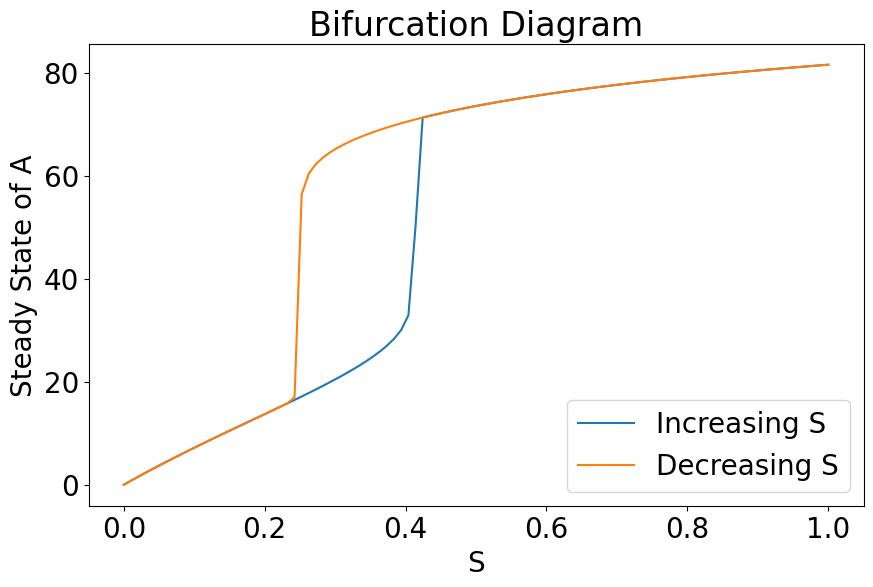

In [73]:
def test(A, t, S):
    kp = 0.1
    beta = 10
    K = 50
    kd = 0.13
    n = 4
    dA_dt = kp * S * (100 - A) + beta * (A**n / (K**n + A**n)) - kd * A
    return dA_dt

def forward(A_0, tvec, S):
    y = odeint(test, A_0, tvec, args=(S,))
    return y[-1][0]  

tvec = np.arange(0, 100, 0.01)  
S_values = np.linspace(0, 1, 100)

steady_states_increasing = []
A_steady = 0  

for S in S_values:
    A_steady = forward(A_steady, tvec, S)
    steady_states_increasing.append(A_steady)

steady_states_decreasing = []
A_steady = steady_states_increasing[-1]  

for S in reversed(S_values):
    A_steady = forward(A_steady, tvec, S)
    steady_states_decreasing.append(A_steady)

steady_states_decreasing = steady_states_decreasing[::-1]

plt.figure(figsize=(10, 6))
plt.plot(S_values, steady_states_increasing, label='Increasing S')
plt.plot(S_values, steady_states_decreasing, label='Decreasing S')
plt.xlabel('S')
plt.ylabel('Steady State of A')
plt.title('Bifurcation Diagram')
plt.legend()
plt.show()


---



---

Finally, calculate numerically the bifurcation diagram for $k_d=0.13$ and compare it again with the case $k_d=0.11$.

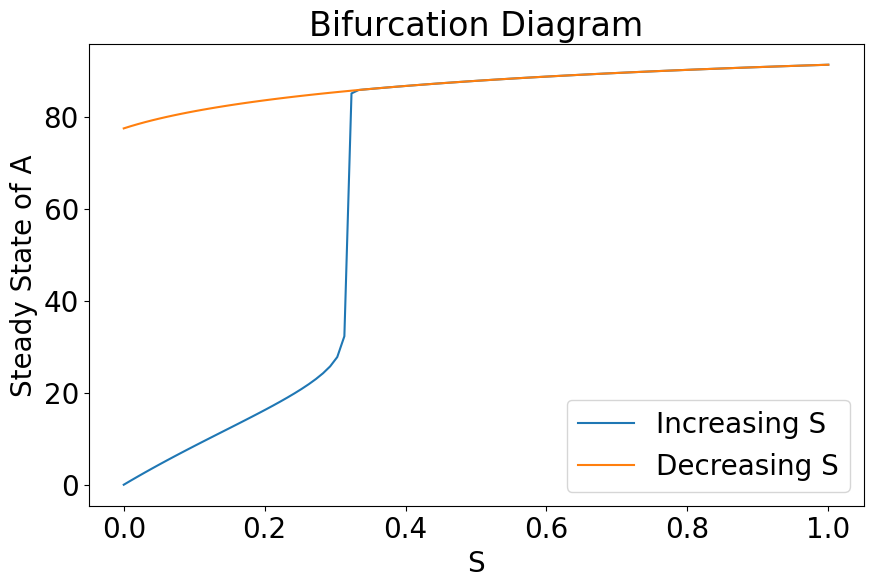

In [74]:
def test(A, t, S):
    kp = 0.1
    beta = 10
    K = 50
    kd = 0.13
    n = 4
    dA_dt = kp * S * (100 - A) + beta * (A**n / (K**n + A**n)) - kd * A
    return dA_dt

def forward(A_0, tvec, S):
    y = odeint(test, A_0, tvec, args=(S,))
    return y[-1][0]  

tvec = np.arange(0, 100, 0.01)  
S_values = np.linspace(0, 1, 100)

steady_states_increasing = []
A_steady = 0  

for S in S_values:
    A_steady = forward(A_steady, tvec, S)
    steady_states_increasing.append(A_steady)

steady_states_decreasing = []
A_steady = steady_states_increasing[-1]  

for S in reversed(S_values):
    A_steady = forward(A_steady, tvec, S)
    steady_states_decreasing.append(A_steady)

steady_states_decreasing = steady_states_decreasing[::-1]

plt.figure(figsize=(10, 6))
plt.plot(S_values, steady_states_increasing, label='Increasing S')
plt.plot(S_values, steady_states_decreasing, label='Decreasing S')
plt.xlabel('S')
plt.ylabel('Steady State of A')
plt.title('Bifurcation Diagram')
plt.legend()
plt.show()


---

<span style="color:red">Comment your result here</span>

---